In [1]:
import scanpy as sc
import gzip
import os
import pandas as pd
import json
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import openslide

In [2]:
he_pth = '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/VISIUM slides/fallopian_tubes_AJER376_234.ndpi'


In [3]:
# Open the .ndpi file
slide = openslide.OpenSlide(he_pth)

# Get the dimensions of the whole slide at level 0 (highest resolution)
width, height = slide.dimensions
print(f"Full resolution dimensions: {width} x {height}")

# Read the entire slide at full resolution
# Be careful: This could consume a lot of memory depending on the size!
width = 63850-8300
height = 45395-3815
full_slide_image = slide.read_region((8300, 3815), 0, (width, height))

# Convert the image to RGB (PIL Image)
img = full_slide_image.convert("RGB")

# Close the slide after use
slide.close()

Full resolution dimensions: 103680 x 57728


In [4]:
Image.MAX_IMAGE_PIXELS = None

In [5]:
print([img.width, img.height])

[55550, 41580]


In [6]:
img.size

(55550, 41580)

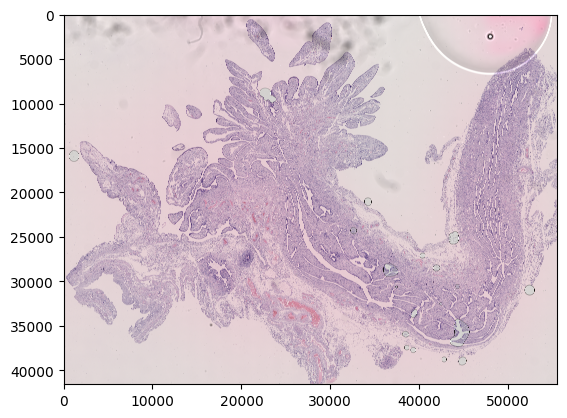

In [7]:
plt.imshow(img)

In [8]:
from tifffile import imwrite

outpth = '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/VISIUM slides/01_spaceranger_count/1--234/outs/iStar/whole_slide_from_visium/he-raw.tiff'

imwrite(outpth, np.array(img))

In [8]:
outpth = '/home/donald/Desktop/Andre_expansion/data/CODA Fallopian tube/VISIUM slides/01_spaceranger_count/1--234/outs/iStar/whole_slide_from_visium/he-raw.png'
# If you already have an Image object, you can save it directly:
img.save(outpth, 'PNG')

In [ ]:
def tile_image(image, tile_size):
    # added by DK
    """Divide the image into tiles."""
    tiles = []
    h, w = image.shape[:2]
    
    for i in range(0, h, tile_size):
        for j in range(0, w, tile_size):
            # Define the tile boundaries
            tile = image[i:i + tile_size, j:j + tile_size]
            tiles.append((tile, i, j))  # Include position for merging later
            
    return tiles